# Estimating LAD (Least Absolute Deviations) Regression

In [31]:
using Pkg; Pkg.activate(".")

  Activating project at `~/code/julia/notebooks`


In [49]:
using JuMP, HiGHS

## Phone Data 

In [50]:
year = collect(50:73)
calls=[4.4, 4.7, 4.7, 5.9, 6.6, 7.3, 8.1, 8.8, 10.6, 12.0, 13.5, 14.9, 16.1, 21.2, 119.0, 124.0,
          142.0, 159.0, 182.0, 212.0, 43.0, 24.0, 27.0, 29.0];

## Scatter Plot

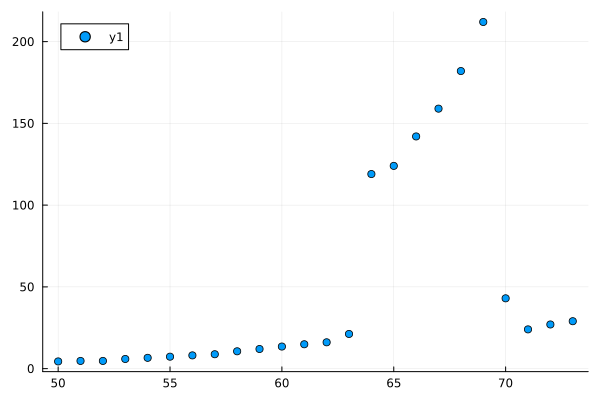

In [51]:
scatter(year, calls)

## Goal Programming Model

$$
\begin{aligned}
\min z & = \sum_{i=1}^{n} d_i^{-} + d_i^{+}\\
\text{subject to:} \\
& y[i] - \beta_0 - \beta_1 x[i] + d_1^{-} - d_1^{+} = 0 \\
& d_i^{-}, d_i^{+} \ge 0 \\
& \beta_0, \beta_1 \in  \mathbb{R} \\
& i = 1, 2, \ldots, n
\end{aligned}
$$

## Creating Model

In [52]:
@info "Creating model"
m = Model(HiGHS.Optimizer)
MOI.set(m, MOI.Silent(), true)

[ Info: Creating model


## Number of observations

In [36]:
n = length(year)
@info "Length" n

┌ Info: Length
└   n = 24


## Creating Decision Variables

In [37]:
@info "Creating variables"
@variable(m, d[1:(2n)])
@variable(m, beta0)
@variable(m, beta1);

[ Info: Creating variables


## Creating objective function

In [38]:
@info "Creating Goal function"
@objective(m, Min, sum(d[i] for i in 1:(2n)))

[ Info: Creating Goal function


d[1] + d[2] + d[3] + d[4] + d[5] + d[6] + d[7] + d[8] + d[9] + d[10] + d[11] + d[12] + d[13] + d[14] + d[15] + d[16] + d[17] + d[18] + d[19] + d[20] + d[21] + d[22] + d[23] + d[24] + d[25] + d[26] + d[27] + d[28] + d[29] + d[30] + d[31] + d[32] + d[33] + d[34] + d[35] + d[36] + d[37] + d[38] + d[39] + d[40] + d[41] + d[42] + d[43] + d[44] + d[45] + d[46] + d[47] + d[48]

## Creating constraints

In [39]:
@info "Creating constraints"
for i in 1:n
    @constraint(m,  calls[i] - beta0 - beta1 * year[i] + d[i] - d[n + i] == 0)
end

[ Info: Creating constraints


In [40]:
@info "Adding sign constraints"
for i in 1:(2n)
    @constraint(m, d[i] >= 0)
end

[ Info: Adding sign constraints


## Solve!

In [41]:
@info "Solving"
optimize!(m)

[ Info: Solving


In [42]:
@info value(beta0)
@info value(beta1)

[ Info: -56.60909090909087
[ Info: 1.172727272727272


## Estimated Regression Model

$$
\hat{y} = -56.609 + 1.1727 x 
$$

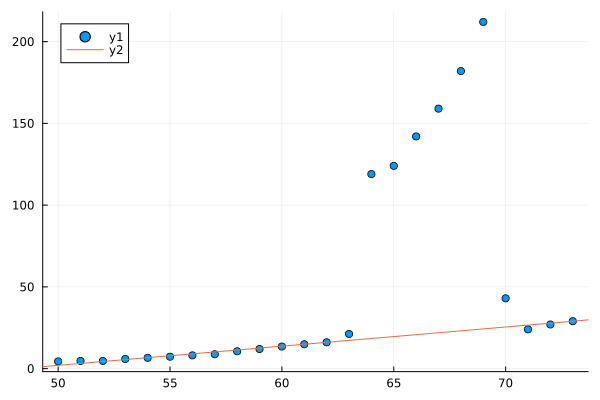

In [54]:
scatter(year,calls)
Plots.abline!(1.1727, -56.609)

In [44]:
JuMP.latex_formulation(m)

$$ \begin{aligned}
\min\quad & d_{1} + d_{2} + d_{3} + d_{4} + d_{5} + d_{6} + d_{7} + d_{8} + d_{9} + d_{10} + d_{11} + d_{12} + d_{13} + d_{14} + d_{15} + d_{16} + d_{17} + d_{18} + d_{19} + d_{20} + d_{21} + d_{22} + d_{23} + d_{24} + d_{25} + d_{26} + d_{27} + d_{28} + d_{29} + d_{30} + d_{31} + d_{32} + d_{33} + d_{34} + d_{35} + d_{36} + d_{37} + d_{38} + d_{39} + d_{40} + d_{41} + d_{42} + d_{43} + d_{44} + d_{45} + d_{46} + d_{47} + d_{48}\\
\text{Subject to} \quad & d_{1} - d_{25} - beta0 - 50 beta1 = -4.4\\
 & d_{2} - d_{26} - beta0 - 51 beta1 = -4.7\\
 & d_{3} - d_{27} - beta0 - 52 beta1 = -4.7\\
 & d_{4} - d_{28} - beta0 - 53 beta1 = -5.9\\
 & d_{5} - d_{29} - beta0 - 54 beta1 = -6.6\\
 & d_{6} - d_{30} - beta0 - 55 beta1 = -7.3\\
 & d_{7} - d_{31} - beta0 - 56 beta1 = -8.1\\
 & d_{8} - d_{32} - beta0 - 57 beta1 = -8.8\\
 & d_{9} - d_{33} - beta0 - 58 beta1 = -10.6\\
 & d_{10} - d_{34} - beta0 - 59 beta1 = -12\\
 & d_{11} - d_{35} - beta0 - 60 beta1 = -13.5\\
 & d_{12} - d_

# A tiny example

In [45]:
x = [1.0, 2.0, 3.0, 4.0, 5.0]

5-element Vector{Float64}:
 1.0
 2.0
 3.0
 4.0
 5.0

In [46]:
y = [3.0, 6.5, 5.5, 8.5, 9.8]

5-element Vector{Float64}:
 3.0
 6.5
 5.5
 8.5
 9.8

In [53]:
begin
    m = Model(HiGHS.Optimizer)
    MOI.set(m, MOI.Silent(), true)
    @variable(m, beta0)
    @variable(m, beta1)
    @variable(m, dminus[1:5] >= 0)
    @variable(m, dplus[1:5] >= 0)
    @objective(m, Min, sum(dminus) + sum(dplus))
    for i in 1:5
        @constraint(m, beta0 + beta1 * x[i] + dminus[i] - dplus[i] == y[i])
    end 
    optimize!(m)
    println("beta0: ", value(beta0))
    println("beta1: ", value(beta1))
    for i in 1:5
        println("dminus[$i] = ", value(dminus[i]))
        println("dplus[$i] = ", value(dplus[i]))
    end
end

beta0: 1.2999999999999998
beta1: 1.7000000000000002
dminus[1] = 0.0
dplus[1] = 0.0
dminus[2] = 1.7999999999999998
dplus[2] = 0.0
dminus[3] = 0.0
dplus[3] = 0.9000000000000004
dminus[4] = 0.39999999999999947
dplus[4] = 0.0
dminus[5] = 0.0
dplus[5] = 0.0


In [48]:
JuMP.latex_formulation(m)

$$ \begin{aligned}
\min\quad & dminus_{1} + dminus_{2} + dminus_{3} + dminus_{4} + dminus_{5} + dplus_{1} + dplus_{2} + dplus_{3} + dplus_{4} + dplus_{5}\\
\text{Subject to} \quad & beta0 + beta1 + dminus_{1} - dplus_{1} = 3\\
 & beta0 + 2 beta1 + dminus_{2} - dplus_{2} = 6.5\\
 & beta0 + 3 beta1 + dminus_{3} - dplus_{3} = 5.5\\
 & beta0 + 4 beta1 + dminus_{4} - dplus_{4} = 8.5\\
 & beta0 + 5 beta1 + dminus_{5} - dplus_{5} = 9.8\\
 & dminus_{1} \geq 0\\
 & dminus_{2} \geq 0\\
 & dminus_{3} \geq 0\\
 & dminus_{4} \geq 0\\
 & dminus_{5} \geq 0\\
 & dplus_{1} \geq 0\\
 & dplus_{2} \geq 0\\
 & dplus_{3} \geq 0\\
 & dplus_{4} \geq 0\\
 & dplus_{5} \geq 0\\
\end{aligned} $$